In [2]:
import sys
import os
sys.path.append(os.path.abspath('..'))  # Add project root to Python path
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from src.utils import load_train_data, load_test_data
train_df = load_train_data()
test_df = load_test_data()

In [4]:
train_df.head(10)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
5,19,0,5,1,4,0,0,0,0,0,...,4,2,0,9,0,1,0,1,1,1
6,20,0,2,1,3,1,0,0,1,0,...,3,0,0,10,0,1,0,0,1,0
7,22,0,5,1,4,0,0,1,0,0,...,7,1,3,6,1,0,1,0,1,0
8,26,0,5,1,3,1,0,0,0,1,...,4,2,1,5,0,1,0,0,0,1
9,28,1,1,1,2,0,0,0,1,0,...,3,5,0,6,0,1,0,0,1,0


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [6]:
# target = train_df['target']
train_id = train_df['id']
train_df = train_df.drop(columns = ['id'])

In [7]:
train_df.shape, test_df.shape

((595212, 58), (892816, 58))

In [8]:
(train_df == -1).sum()
# df.isnull().sum()만으로 결측치 알 수 없음 

target                 0
ps_ind_01              0
ps_ind_02_cat        216
ps_ind_03              0
ps_ind_04_cat         83
ps_ind_05_cat       5809
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         107772
ps_car_01_cat        107
ps_car_02_cat          5
ps_car_03_cat     411231
ps_car_04_cat          0
ps_car_05_cat     266551
ps_car_06_cat          0
ps_car_07_cat      11489
ps_car_08_cat          0
ps_car_09_cat        569
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              5
ps_car_12              1
ps_car_13              0
ps_car_14          42620
ps_car_15              0
ps_calc_01             0
ps_calc_02             0


In [9]:
def resumetable(df):
    print(f'Data set: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summary['Missing Data'] = (df == -1).sum().values
    summary['Nunique'] = df.nunique().values
    summary['Feature Type'] = None
    for col in df.columns:
        if 'bin' in col:
            summary.loc[col, 'Feature Type'] = 'Binary'
        elif 'cat' in col:
            summary.loc[col, 'Feature Type'] = 'Nominal'
        elif df[col].dtype == float:
            summary.loc[col, 'Feature Type'] = 'Continuous'
        elif df[col].dtype == int:
            summary.loc[col, 'Feature Type'] = 'Ordinal'

    return summary

In [10]:
summary = resumetable(train_df)
display(summary)

Data set: (595212, 58)


,Data Type,Missing Data,Nunique,Feature Type
target,int64,0,2,Ordinal
ps_ind_01,int64,0,8,Ordinal
ps_ind_02_cat,int64,216,5,Nominal
ps_ind_03,int64,0,12,Ordinal
ps_ind_04_cat,int64,83,3,Nominal
ps_ind_05_cat,int64,5809,8,Nominal
ps_ind_06_bin,int64,0,2,Binary
ps_ind_07_bin,int64,0,2,Binary
ps_ind_08_bin,int64,0,2,Binary
ps_ind_09_bin,int64,0,2,Binary


In [11]:
def write_percent(ax, total_size):
    for patch in ax.patches:
        height = patch.get_height()
        width = patch.get_width()
        left_coord = patch.get_x()
        percent = height / total_size * 100

        ax.text(left_coord + width/2.0,
            height + total_size * 0.001,
            '{:1.1f}%'.format(percent),
            ha='center')

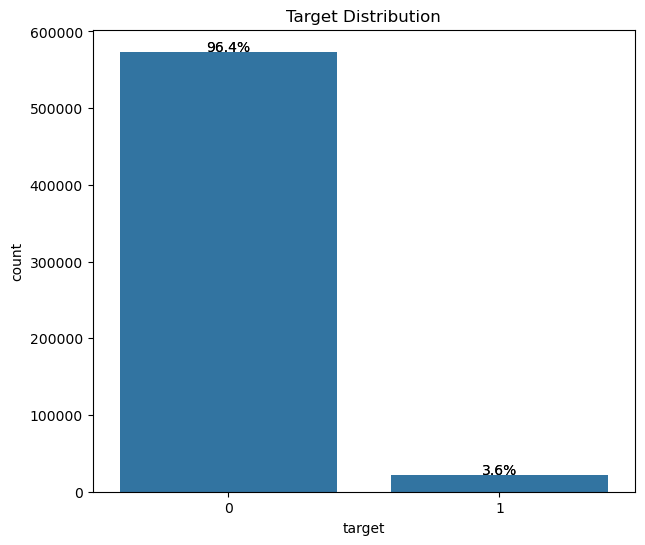

In [12]:
plt.figure(figsize=(7,6))
ax = sns.countplot(x='target', data=train_df)
write_percent(ax, len(train_df))
ax.set_title('Target Distribution')

write_percent(ax, len(train_df))
plt.show()

-> 소수 운전자만 보험금 청구, 타깃 불균형 
어떤 feature A에 대해 고윳값 a,b가 있을 때, 각각 타깃값 1비율이 얼마나 되는지 파악
1. 고윳값별로 타깃값 1비율이 비슷 -> 무의미한 데이터
2. 타깃값 차이는 나지만 신뢰구간이 지나치게 큼 -> 무의미한 데이터 

In [14]:
def plot_multiple_axes(df, cols, plot_type='hist', target=None, n_cols=3, height=4, bins=30, xrot=0, exclude_cols=None):
    """
    여러 피처의 시각화를 한 번에 출력하는 범용 함수
    특정 피처를 제외하고 시각화할 수 있는 기능을 추가.
    boxplot/violinplot 시 target을 x축으로 고정하여 분포 비교에 최적화.

    Parameters:
        df (pd.DataFrame): 데이터프레임
        cols (list): 시각화할 전체 컬럼 리스트 (exclude_cols에 따라 필터링됨)
        plot_type (str): 'hist', 'count', 'bar', 'box', 'violin' 중 하나
        target (str, optional): barplot, boxplot, violinplot일 경우 사용할 타겟 변수명.
                                 'bar'일 땐 y축, 'box'/'violin'일 땐 x축으로 사용됨.
        n_cols (int): 한 줄에 그릴 그래프 수
        height (int): 서브플롯 하나의 높이
        bins (int): histplot용 구간 수
        xrot (int): x축 레이블 회전 각도
        exclude_cols (list, optional): 시각화에서 제외할 컬럼 리스트. 기본값은 None.
    """
    # 제외할 컬럼 필터링
    # cols는 Index 타입일 수도 리스트 타입일 수도 있으므로, 리스트로 변환하여 처리.
    cols_list = cols.tolist() if isinstance(cols, pd.Index) else list(cols)

    if exclude_cols:
        cols_to_plot = [col for col in cols_list if col not in exclude_cols]
    else:
        cols_to_plot = cols_list

    # 필터링된 컬럼 리스트가 비어있는지 확인
    if not cols_to_plot: # 이 부분이 if not cols_to_plot: 이었음.
        print("시각화할 컬럼이 없습니다.")
        return

    n_rows = (len(cols_to_plot) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * height))
    axes = axes.flatten()

    for i, col in enumerate(cols_to_plot):
        ax = axes[i]
        if plot_type == 'hist':
            sns.histplot(data=df, x=col, bins=bins, ax=ax, kde=True, hue=col, palette='pastel', legend=False)
        elif plot_type == 'count':
            sns.countplot(data=df, x=col, ax=ax, hue=col, palette='pastel', legend=False)
        elif plot_type == 'bar' and target:
            sns.barplot(data=df, x=col, y=target, ax=ax, hue=col, palette='pastel', legend=False)
        elif plot_type == 'box' and target:
            sns.boxplot(data=df, x=target, y=col, ax=ax, hue=col, palette='pastel', legend=False)
        elif plot_type == 'violin' and target:
            sns.violinplot(data=df, x=target, y=col, ax=ax, hue=col, palette='pastel', legend=False)
        else:
            ax.text(0.5, 0.5, 'Invalid plot_type or missing target', ha='center')

        ax.set_title(f'{col} ({plot_type})')
        ax.tick_params(axis='x', rotation=xrot)

    # 여분 축 제거
    # 현재 i는 마지막으로 그려진 플롯의 인덱스이므로, i+1부터 제거 시작
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Helper function to write percentages on countplots/barplots (for completeness)
def write_percent(ax, total_size):
    for patch in ax.patches:
        height = patch.get_height()
        width = patch.get_width()
        left_coord = patch.get_x()
        percent = height / total_size * 100

        ax.text(left_coord + width/2.0,
            height + total_size * 0.001,
            '{:1.1f}%'.format(percent),\
            ha='center')

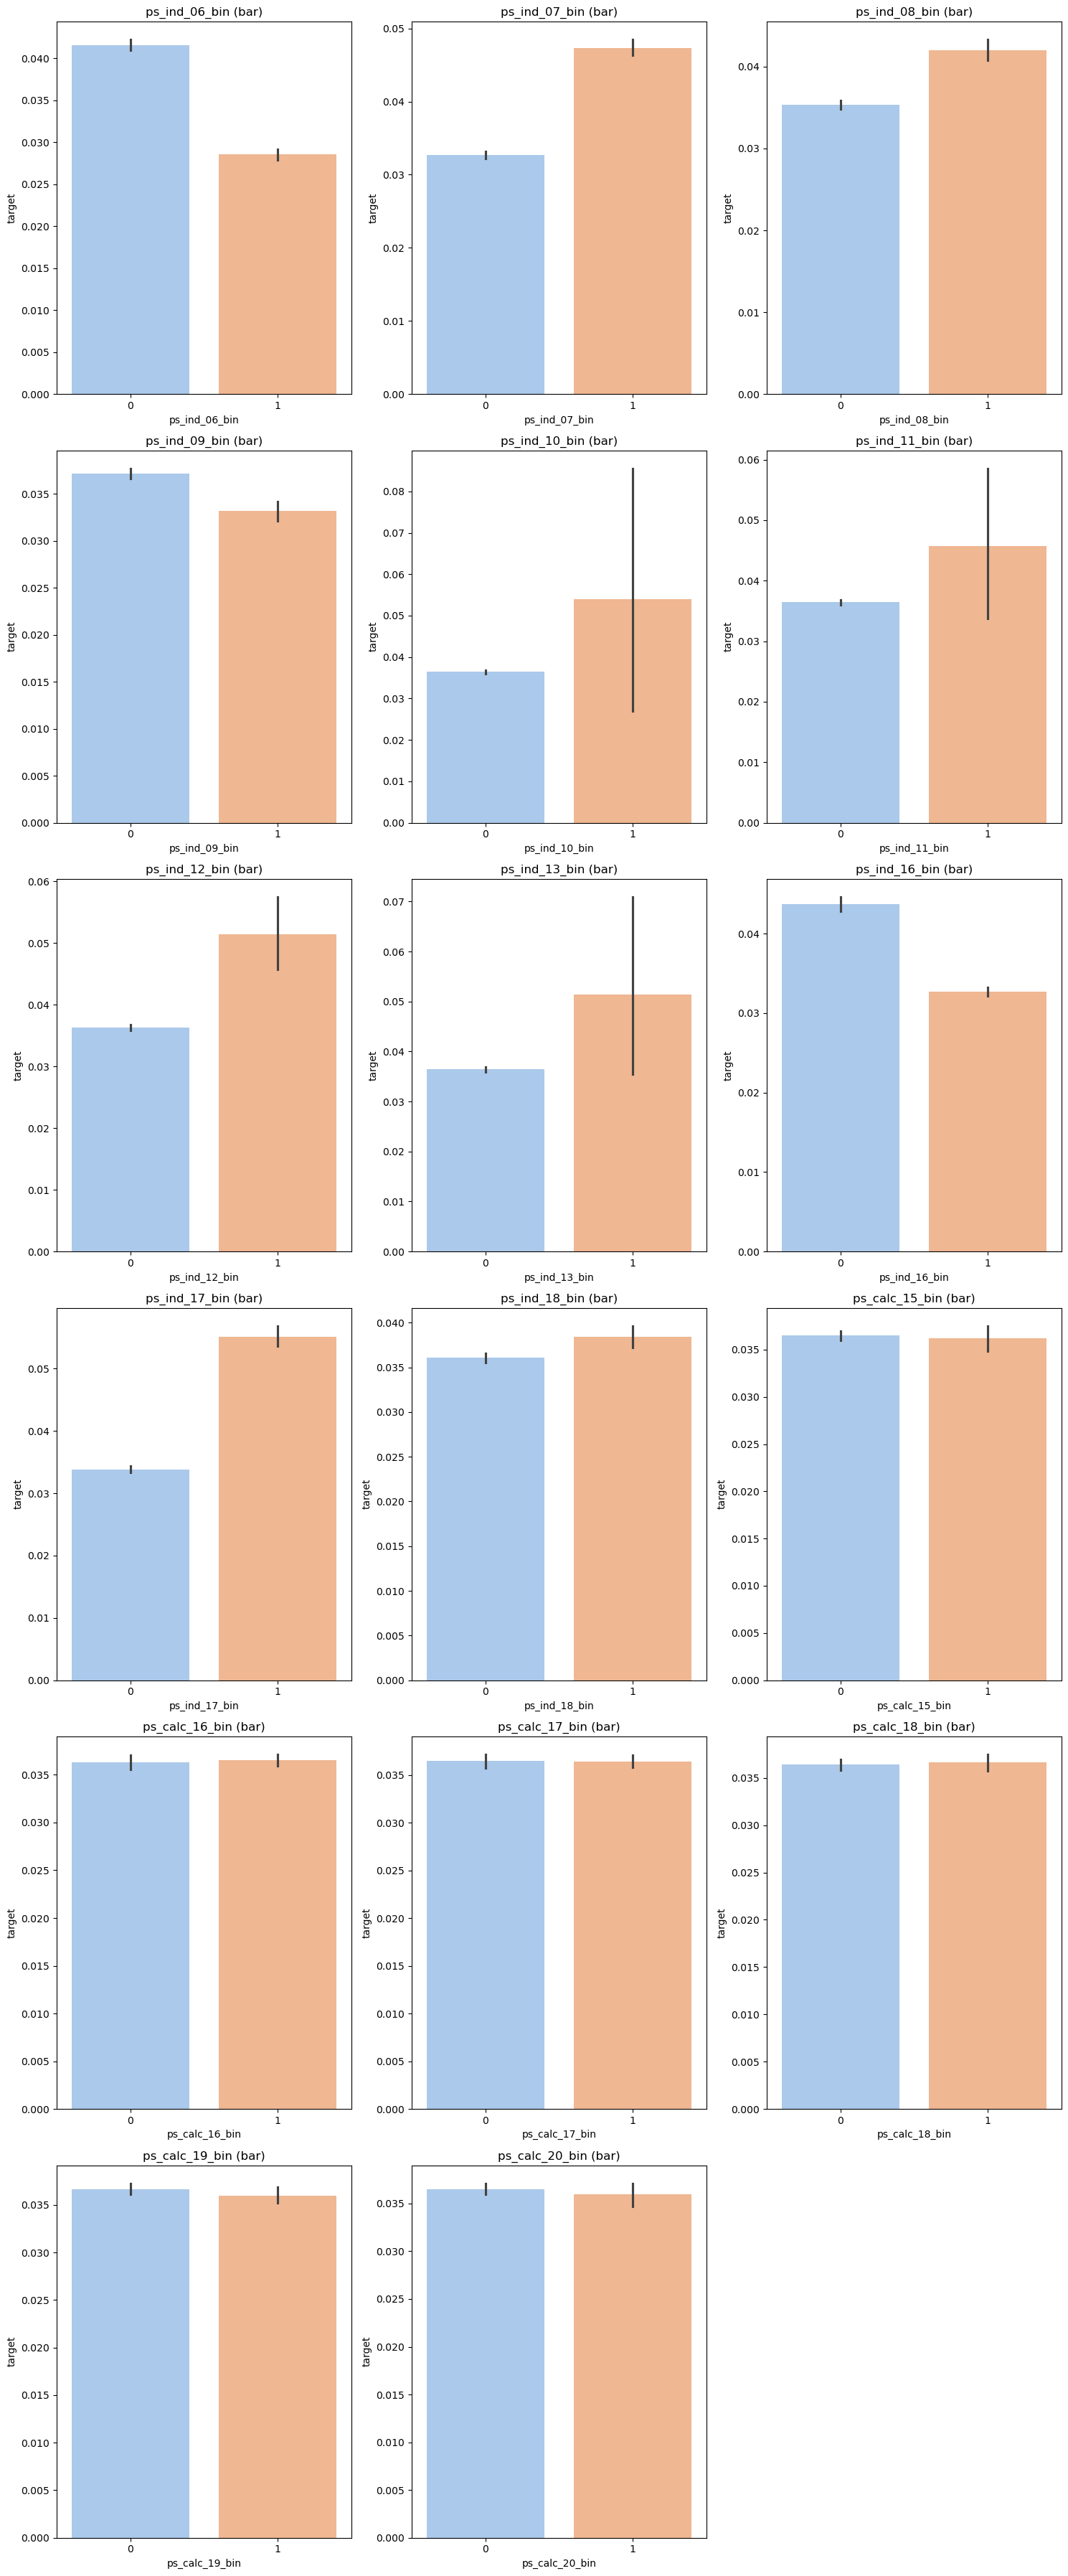

In [15]:
bin_features = summary[summary['Feature Type'] == 'Binary'].index.tolist()
plot_multiple_axes(train_df, bin_features, plot_type='bar', target='target', n_cols=3, height=6)

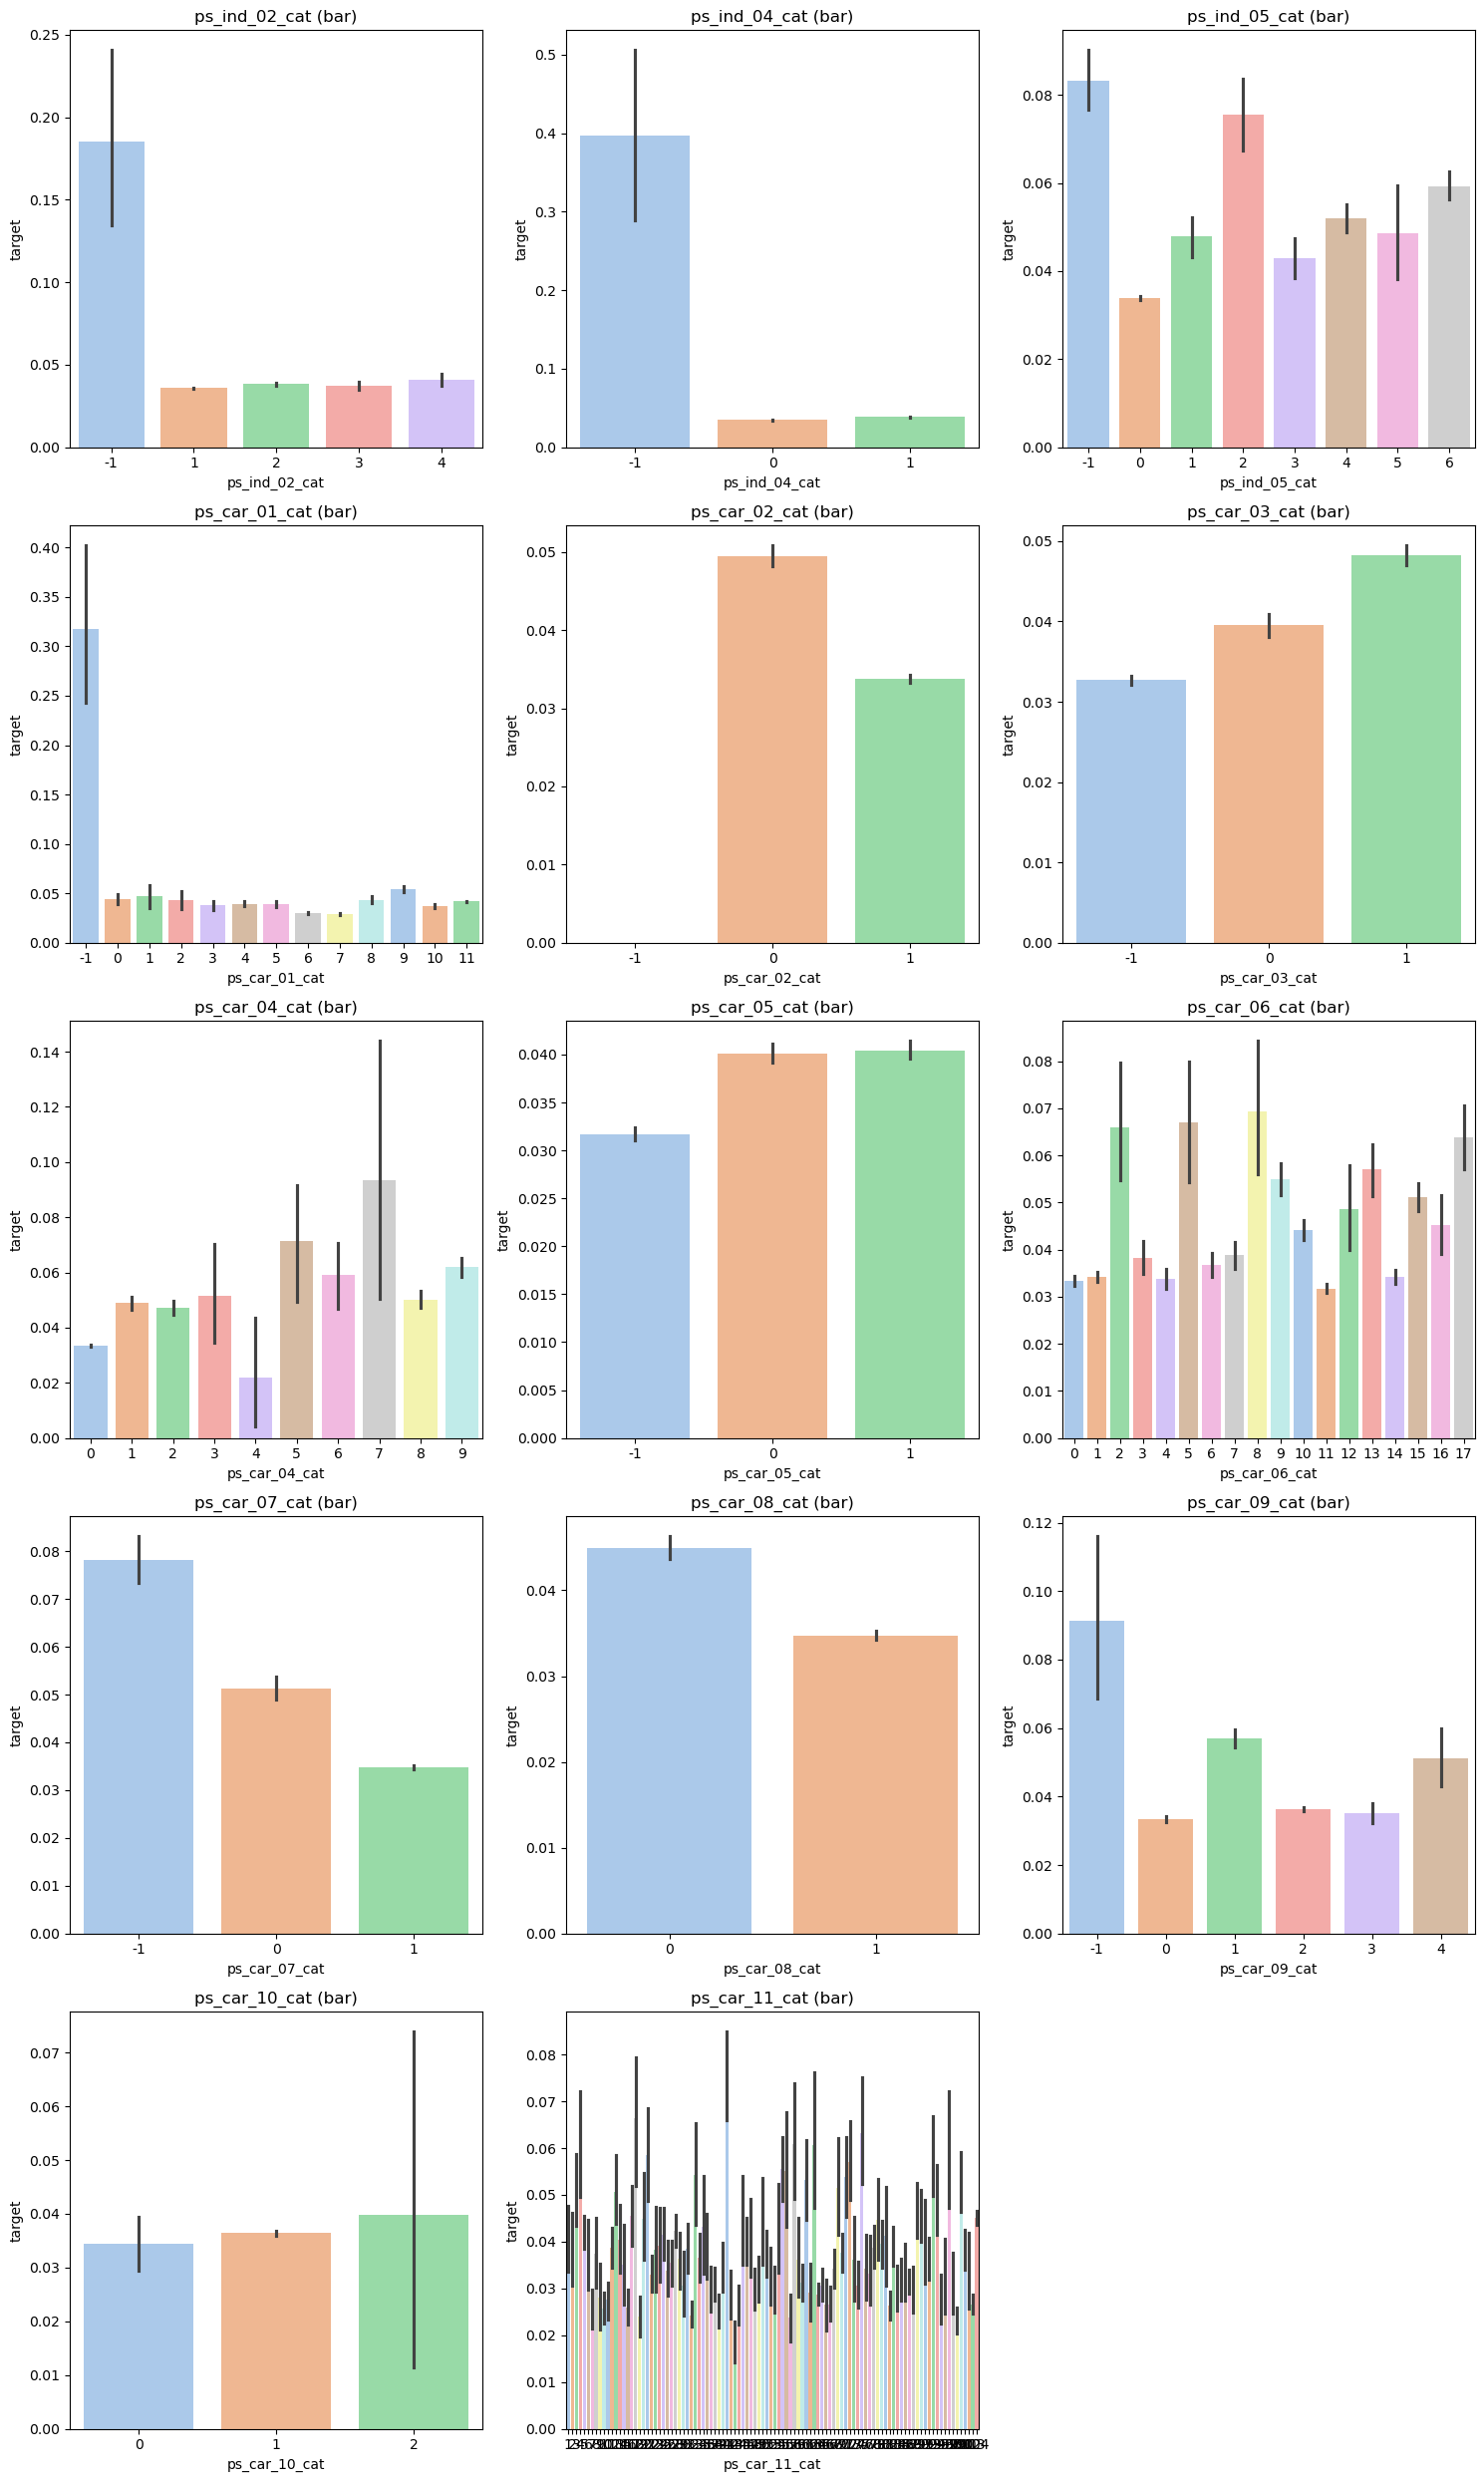

In [16]:
nom_features = summary[summary['Feature Type'] == 'Nominal'].index
plot_multiple_axes(train_df, nom_features, plot_type='bar', target='target', n_cols=3, height=5)

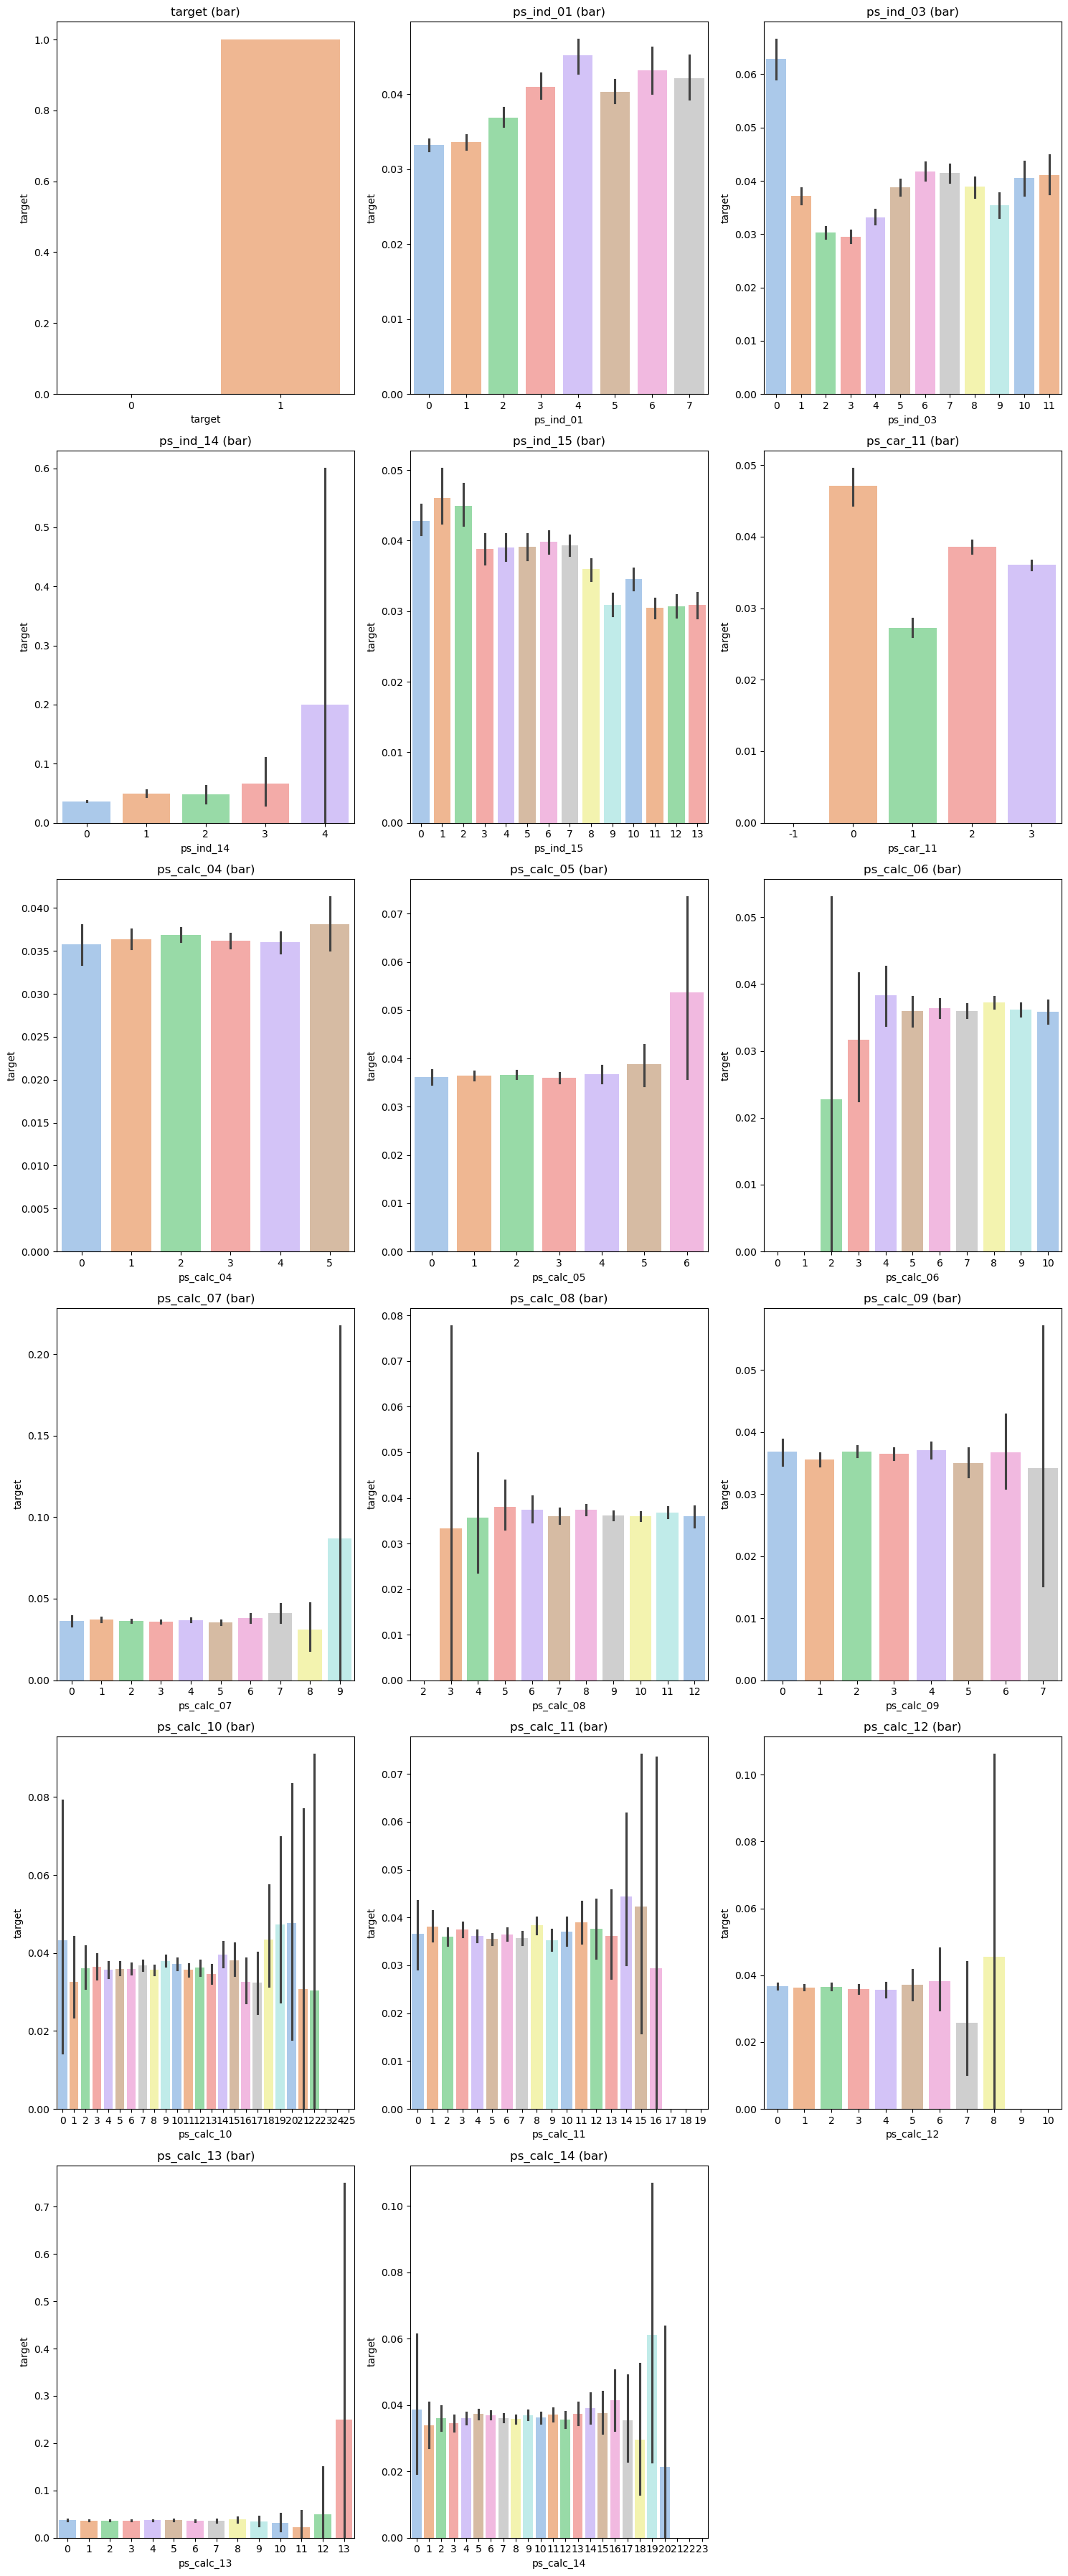

In [17]:
ord_features = summary[summary['Feature Type'] == 'Ordinal'].index
plot_multiple_axes(train_df, ord_features, plot_type='bar', target='target', n_cols=3, height=6)

In [18]:
print("--- ps_ind_10_bin value_counts ---")
print(train_df['ps_ind_10_bin'].value_counts())

print("\n--- ps_ind_11_bin value_counts ---")
print(train_df['ps_ind_11_bin'].value_counts())

print("\n--- ps_ind_13_bin value_counts ---")
print(train_df['ps_ind_13_bin'].value_counts())

print("\n--- ps_ind_12_bin value_counts ---")
print(train_df['ps_ind_12_bin'].value_counts())

print("\n--- ps_ind_17_bin value_counts ---")
print(train_df['ps_ind_17_bin'].value_counts())

--- ps_ind_10_bin value_counts ---
ps_ind_10_bin
0    594990
1       222
Name: count, dtype: int64

--- ps_ind_11_bin value_counts ---
ps_ind_11_bin
0    594205
1      1007
Name: count, dtype: int64

--- ps_ind_13_bin value_counts ---
ps_ind_13_bin
0    594648
1       564
Name: count, dtype: int64

--- ps_ind_12_bin value_counts ---
ps_ind_12_bin
0    589594
1      5618
Name: count, dtype: int64

--- ps_ind_17_bin value_counts ---
ps_ind_17_bin
0    523143
1     72069
Name: count, dtype: int64


In [19]:
def col_value_counts(df, column):
    print(f'--- {column} value_counts ---')
    print(df[column].value_counts())

In [20]:
col_value_counts(train_df, 'ps_calc_13')

--- ps_calc_13 value_counts ---
ps_calc_13
2     139334
3     132412
1      96661
4      95753
5      54560
0      33658
6      26326
7      11003
8       3882
9       1160
10       351
11        88
12        20
13         4
Name: count, dtype: int64


In [21]:
col_value_counts(train_df, 'ps_ind_14')
col_value_counts(train_df, 'ps_car_10_cat')

--- ps_ind_14 value_counts ---
ps_ind_14
0    588832
1      5495
2       744
3       136
4         5
Name: count, dtype: int64
--- ps_car_10_cat value_counts ---
ps_car_10_cat
1    590179
0      4857
2       176
Name: count, dtype: int64


In [22]:
cont_features = summary[summary['Feature Type'] == 'Continuous'].index # index: summary df에서 특정 조건 만족하는 행의 '인덱스'만을 추출
corr_cols = cont_features.tolist() + ['target']
corr_df = train_df[corr_cols]
corr_df.corr()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,target
ps_reg_01,1.000000,0.471027,0.637035,0.018802,0.027097,0.012704,0.002765,-0.000891,0.002194,-0.001538,0.022888
ps_reg_02,0.471027,1.000000,0.516457,0.171416,0.194316,0.004147,0.054510,0.001347,-0.000770,0.000022,0.034800
ps_reg_03,0.637035,0.516457,1.000000,0.082578,0.099415,0.006271,0.022930,-0.001484,0.002147,-0.000401,0.030888
ps_car_12,0.018802,0.171416,0.082578,1.000000,0.671720,0.012395,0.049882,-0.000700,-0.000427,0.000172,0.038790
ps_car_13,0.027097,0.194316,0.099415,0.671720,1.000000,-0.037310,0.529519,0.000157,0.000040,-0.000200,0.053899
ps_car_14,0.012704,0.004147,0.006271,0.012395,-0.037310,1.000000,-0.033060,-0.001191,0.001217,0.000433,-0.004474
ps_car_15,0.002765,0.054510,0.022930,0.049882,0.529519,-0.033060,1.000000,0.000344,-0.000252,-0.001043,0.027667
ps_calc_01,-0.000891,0.001347,-0.001484,-0.000700,0.000157,-0.001191,0.000344,1.000000,-0.002418,0.000526,0.001782
ps_calc_02,0.002194,-0.000770,0.002147,-0.000427,0.000040,0.001217,-0.000252,-0.002418,1.000000,0.002948,0.001360
ps_calc_03,-0.001538,0.000022,-0.000401,0.000172,-0.000200,0.000433,-0.001043,0.000526,0.002948,1.000000,0.001907


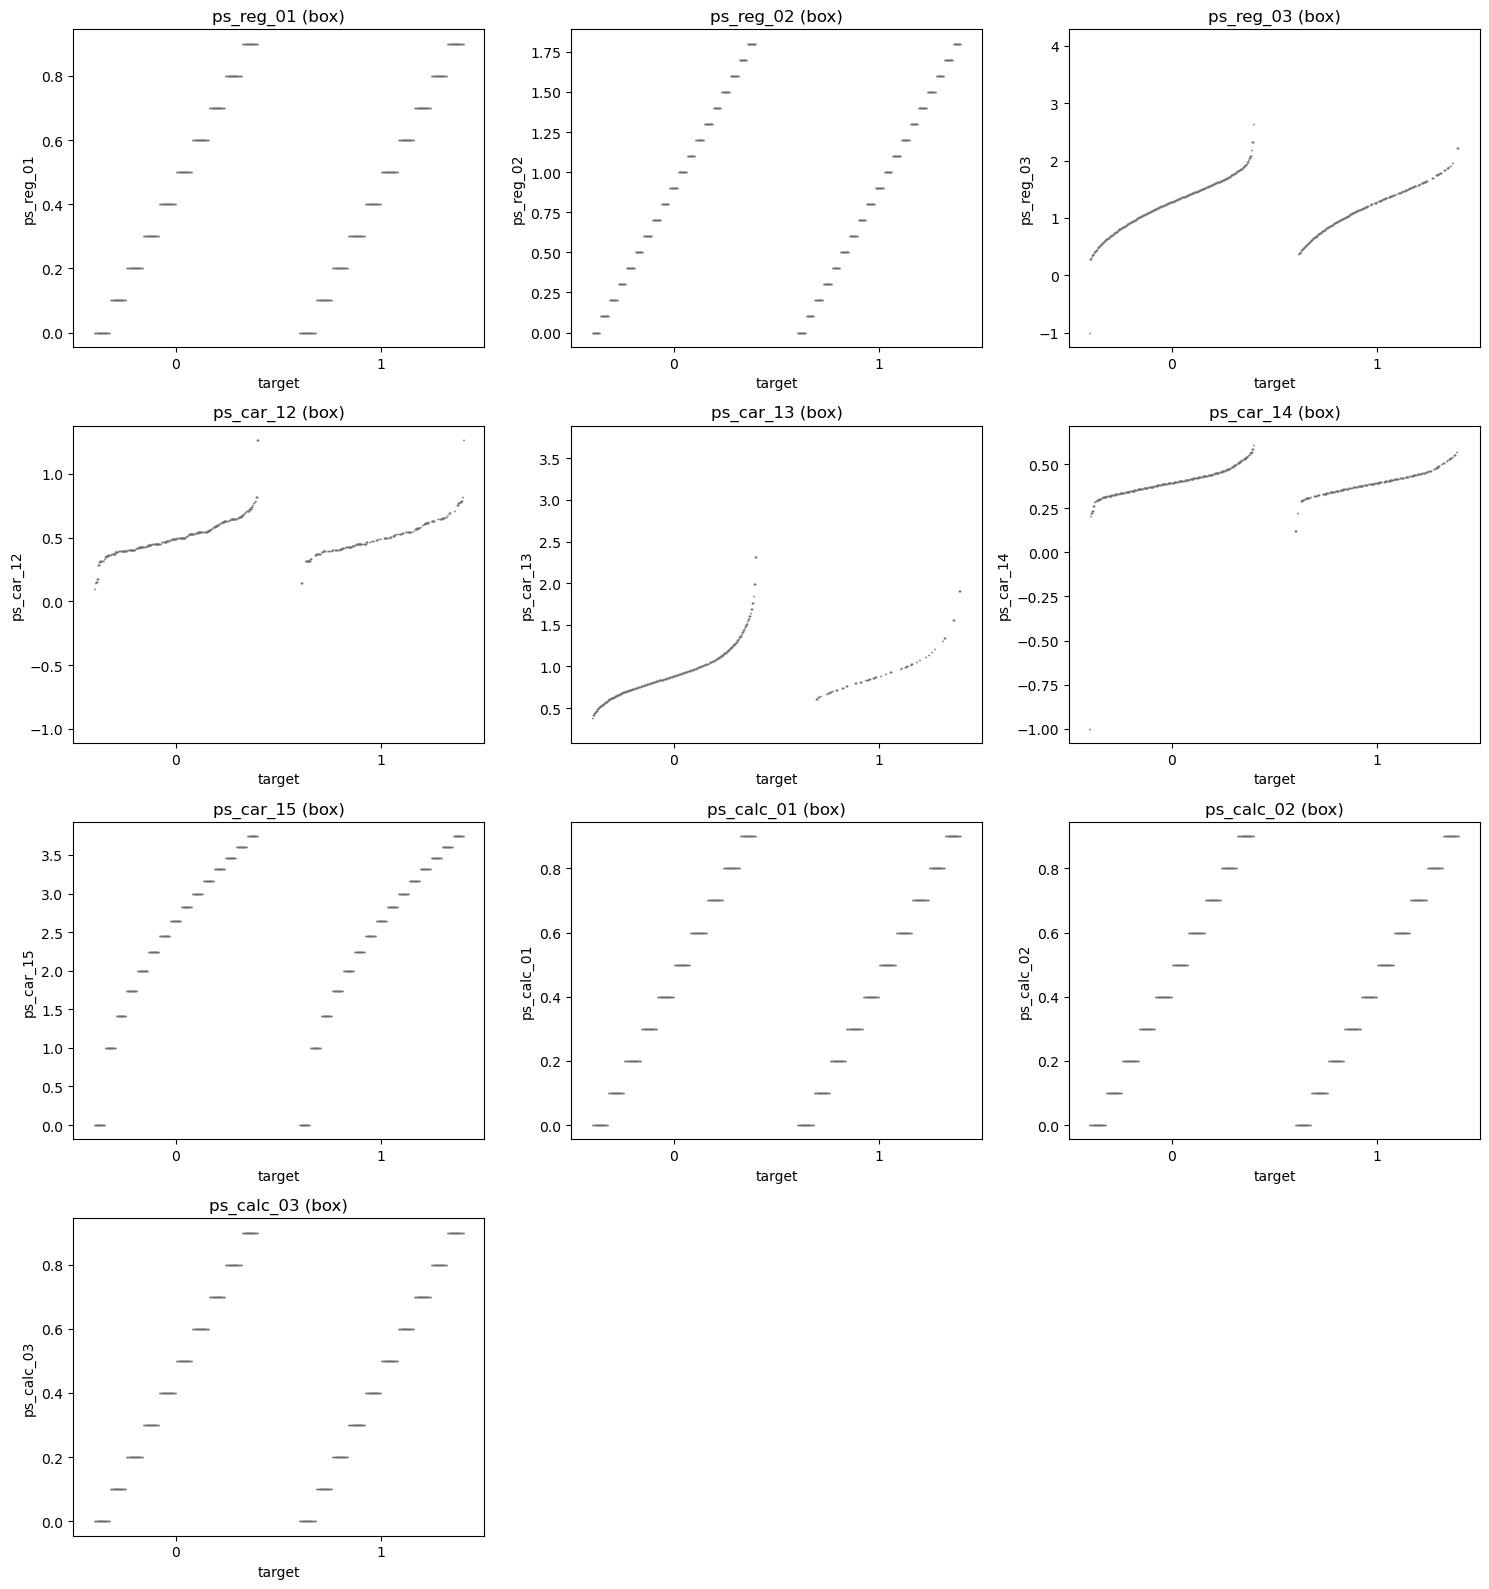

In [71]:
plot_multiple_axes(train_df, cont_features, plot_type='box', target='target', n_cols=3, height=4)

In [24]:
col_value_counts(corr_df, 'ps_car_15')

--- ps_car_15 value_counts ---
ps_car_15
3.605551    109765
3.464102     77200
3.316625     68737
3.162278     63323
3.741657     57757
2.828427     48680
3.000000     48537
2.645751     30388
2.449490     20445
2.236068     19397
0.000000     14186
2.000000     12830
1.732051     10744
1.000000      6708
1.414214      6515
Name: count, dtype: int64


In [25]:
col_cont = ['ps_reg_03', 'ps_car_12', 'ps_car_13', 'ps_car_14']
col_not_cont = []
for col in cont_features:
    if (col not in col_cont):
        col_not_cont.append(col)

In [26]:
print(cont_features)
print(col_cont)
print(col_not_cont)

Index(['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13',
       'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03'],
      dtype='object')
['ps_reg_03', 'ps_car_12', 'ps_car_13', 'ps_car_14']
['ps_reg_01', 'ps_reg_02', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03']


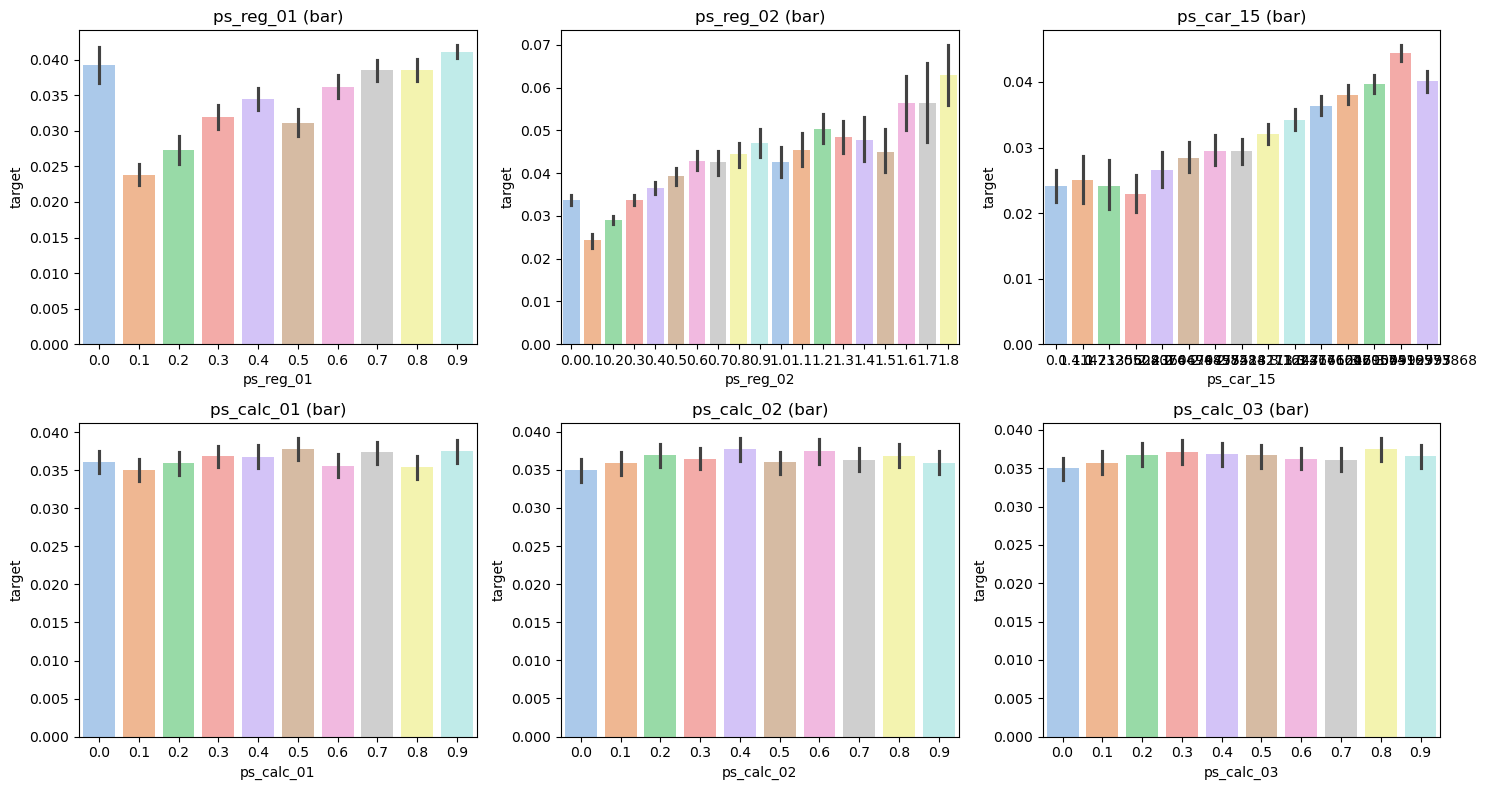

In [27]:
plot_multiple_axes(train_df, col_not_cont, plot_type='bar', target='target', n_cols=3, height=4)
plt.show()

In [28]:
train_df_binned = train_df.copy()
for col in col_cont:
    train_df_binned[col] = pd.qcut(train_df[col], 5)

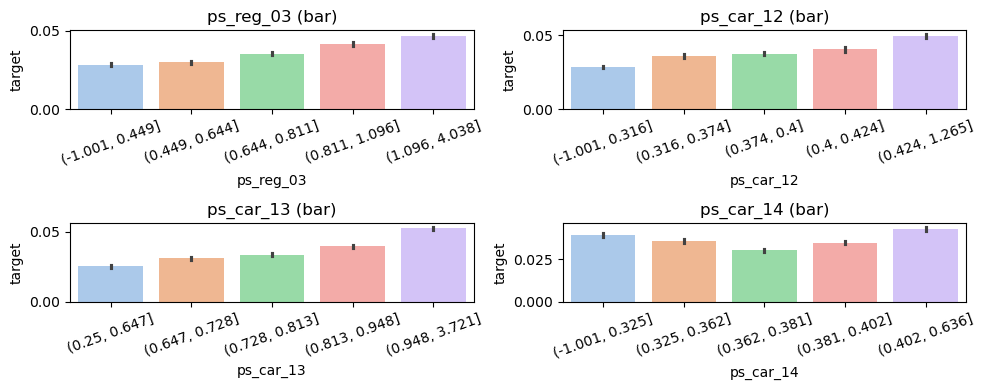

In [29]:
plot_multiple_axes(train_df_binned, col_cont, plot_type='bar', target='target', n_cols=2, height=2, xrot=20)
plt.show()

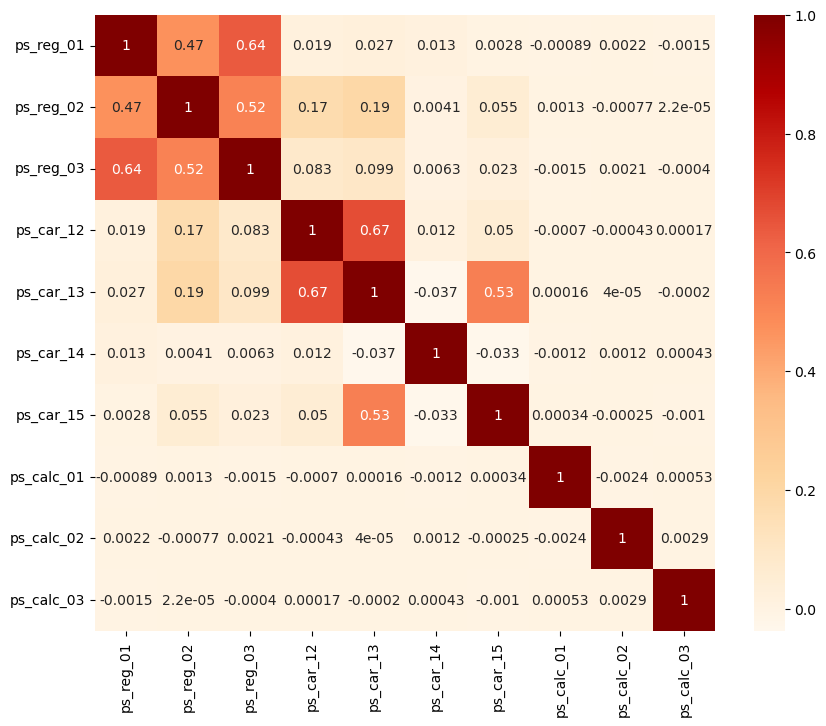

In [30]:
plt.figure(figsize=(10,8))
cont_corr = train_df[cont_features].corr()
sns.heatmap(cont_corr, annot=True, cmap='OrRd')
plt.show()